In [11]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [12]:
df = pd.read_csv('IPEDS_data.csv')
df

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.562951,27.391766,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.012348,40.706861,Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.263775,38.602692,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,455770,Providence Christian College,2013,91104,Bachelor's degree,Los Angeles County,-118.118491,34.172750,Undenominational,Implied no,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


In [13]:
uark = df.loc[df['Name'] == 'University of Arkansas']
uark

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
43,106397,University of Arkansas,2013,72701,Doctor's degree - research/scholarship and pro...,Washington County,-94.178214,36.06153,Not applicable,Implied no,...,22.0,22.0,5.0,50.0,35.0,41.0,41.0,3.0,36209.0,NaN


In [14]:
columns = df.columns
for col in columns:
    print(col)

ID number
Name
year
ZIP code
Highest degree offered
County name
Longitude location of institution
Latitude location of institution
Religious affiliation
Offers Less than one year certificate
Offers One but less than two years certificate
Offers Associate's degree
Offers Two but less than 4 years certificate
Offers Bachelor's degree
Offers Postbaccalaureate certificate
Offers Master's degree
Offers Post-master's certificate
Offers Doctor's degree - research/scholarship
Offers Doctor's degree - professional practice
Offers Doctor's degree - other
Offers Other degree
Applicants total
Admissions total
Enrolled total
Percent of freshmen submitting SAT scores
Percent of freshmen submitting ACT scores
SAT Critical Reading 25th percentile score
SAT Critical Reading 75th percentile score
SAT Math 25th percentile score
SAT Math 75th percentile score
SAT Writing 25th percentile score
SAT Writing 75th percentile score
ACT Composite 25th percentile score
ACT Composite 75th percentile score
Estimate

In [15]:
my_columns = ['Name',
              'Percent admitted - total',
              'ACT Composite 75th percentile score',
              'Graduation rate - Bachelor degree within 4 years, total',
              'Graduation rate - Bachelor degree within 6 years, total',
              'Total  enrollment']
uark[my_columns]

,Name,Percent admitted - total,ACT Composite 75th percentile score,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 6 years, total",Total enrollment
43,University of Arkansas,59.0,28.0,37.0,60.0,25341.0


In [16]:
nerds = df.loc[df['Percent admitted - total'] < 20]
nerds[my_columns]

,Name,Percent admitted - total,ACT Composite 75th percentile score,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 6 years, total",Total enrollment
64,California Institute of Technology,11.0,35.0,82.0,93.0,2181.0
81,University of California-Berkeley,18.0,33.0,72.0,91.0,36198.0
94,Claremont McKenna College,12.0,33.0,84.0,93.0,1328.0
100,Harvey Mudd College,18.0,35.0,86.0,91.0,807.0
122,Pitzer College,15.0,NaN,73.0,82.0,1081.0
124,Pomona College,14.0,34.0,93.0,96.0,1610.0
179,Yale University,7.0,35.0,90.0,98.0,12109.0
189,Georgetown University,17.0,33.0,88.0,92.0,17849.0
289,University of Chicago,9.0,35.0,88.0,93.0,15048.0
320,Northwestern University,15.0,34.0,86.0,94.0,21592.0


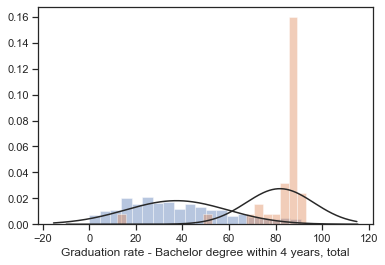

In [17]:
from scipy.stats import norm

sns.set(style="ticks")
sns.distplot(df['Graduation rate - Bachelor degree within 4 years, total'], kde=False, fit=norm, bins=22)
sns.distplot(nerds['Graduation rate - Bachelor degree within 4 years, total'], bins=22,kde=False, fit=norm)

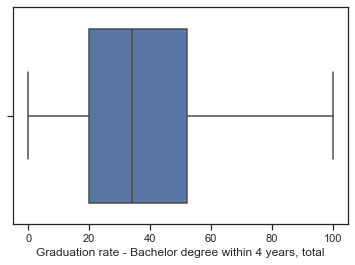

In [18]:
sns.boxplot(x=df['Graduation rate - Bachelor degree within 4 years, total'])

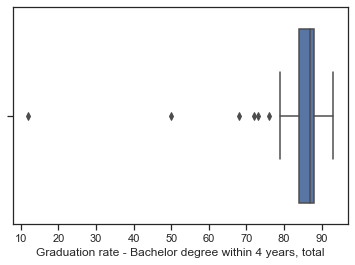

In [19]:
sns.boxplot(nerds['Graduation rate - Bachelor degree within 4 years, total'])

In [20]:
print(np.average(nerds['Graduation rate - Bachelor degree within 4 years, total']))
print(np.median(nerds['Graduation rate - Bachelor degree within 4 years, total']))

81.8529411764706
87.0


In [21]:
# We begin to tweak the college data so that it is
# ready to be trained on / tested with a decision tree.
df = df.fillna(0) # Fill all empty / "not a number" values with 0

# Remove these columns / parameters because either they are too
# hard for the tree to interpret or are useless for detemrining
# the label.
columns_to_drop = [
    'ID number',
    'Name',
    'year',
    'ZIP code',
    'Highest degree offered',
    'County name',
    'Longitude location of institution',
    'Latitude location of institution',
    'Religious affiliation',
    'State abbreviation',
    'FIPS state code',
    'Geographic region',
    'Sector of institution',
    'Level of institution',
    'Control of institution',
    'Degree of urbanization (Urban-centric locale)',
    'Carnegie Classification 2010: Basic'
]

# Yes / Implied No / No values that need to be
# changed to numbers (1's and 0's).
columns_to_binarize = [
    'Offers Less than one year certificate',
    'Offers One but less than two years certificate',
    'Offers Associate\'s degree',
    'Offers Two but less than 4 years certificate',
    'Offers Bachelor\'s degree',
    'Offers Postbaccalaureate certificate',
    'Offers Master\'s degree',
    'Offers Post-master\'s certificate',
    'Offers Doctor\'s degree - research/scholarship',
    'Offers Doctor\'s degree - professional practice',
    'Offers Doctor\'s degree - other',
    'Offers Other degree',
    'Historically Black College or University',
    'Tribal college',
]

label_column = ['Percent admitted - total']

for col in columns_to_binarize:
    df[col].replace(('Yes', 'Implied no', 'No'), (1, 0, 0), inplace=True)

In [44]:
# Label 0 : < 50% admit rate (low)
# Label 1 : > 50% admit rate (high)

rates = df[label_column].to_numpy()
rate_categories = [0 if r < 50 else 1 for r in rates]
# rate_categories

In [47]:
# Split into label (y) and parameters (X).
y = rate_categories # y = df[label_column]
X = df.drop(columns=columns_to_drop)
X = X.drop(columns=label_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
preds = dtree.predict(X_test)

def pred_to_actual(pred):
    if pred == 0:
        return 'low'
    else: # aka pred == 1
        return 'high'

print('Key'.ljust(5), 'Name'.ljust(36), 'Pred'.ljust(6), 'Actual')
for index, (key, sample) in enumerate(X_test.iterrows()):
    print(str(key).ljust(5), 
          df['Name'][key][:34].ljust(36), 
          pred_to_actual(preds[index]).ljust(6), 
          str(df['Percent admitted - total'][key]).ljust(6)
     )

Key   Name                                 Pred   Actual
58    Southern Arkansas University Main    high   61.0  
1225  Bethel University                    high   51.0  
231   Agnes Scott College                  high   67.0  
313   McKendree University                 high   63.0  
1396  Washington and Lee University        low    18.0  
1010  Walsh University                     high   77.0  
728   York College                         high   49.0  
140   Whittier College                     high   63.0  
1179  Roger Williams University            high   81.0  
1477  Antioch University-Midwest           low    0.0   
1283  University of Mary Hardin-Baylor     high   85.0  
213   Keiser University-Ft Lauderdale      high   93.0  
712   Bellevue University                  low    0.0   
536   Emerson College                      high   48.0  
615   Saginaw Valley State University      high   79.0  
1172  Brown University                     low    9.0   
392   Iowa Wesleyan College    

In [58]:
#print(preds)
#print(y_test)


correct = 0
for pred, act in zip(preds, y_test):
    if pred == act:
        correct += 1

print('Accuracy:', correct/len(preds) * 100, '%')

Accuracy: 83.06188925081433 %
